In [1]:
import pandas as pd

df = pd.read_csv("./Mugshots/labels_utf8.csv")

64944


In [2]:
def func(x):
    if x.name == 'person': return x
    vals = x.values
    vals = [(1 if val > 0 else 0) for val in vals]
    return vals

In [3]:
df2 = pd.read_csv('./dataset/lfw_attributes.csv', delimiter='\t', header=[1])
column_interest = ['person', 'Male', 'Asian', 'White', 'Black']
df2 = df2[column_interest]
df5 = df2.apply(func)

10181


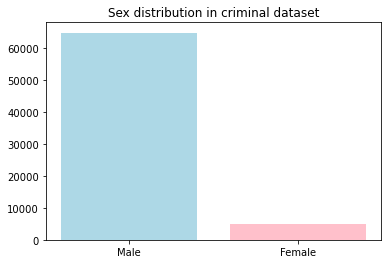

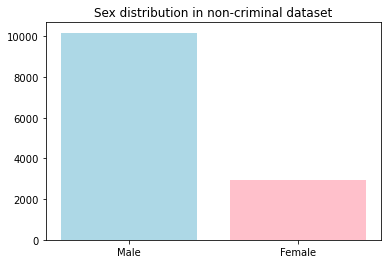

In [4]:
import matplotlib.pyplot as plt

num_male_criminal = df[df['Sex'] == 'Male']['ID'].count()
num_female_criminal = df[df['Sex'] == 'Female']['ID'].count()

plt.figure()
plt.title('Sex distribution in criminal dataset')
plt.bar(['Male','Female'], [num_male_criminal, num_female_criminal], color=['lightblue', 'pink'])
plt.show()

num_male_non_criminal = df5[df5['Male'] == 1]['person'].count()
num_female_non_criminal = df5[df5['Male'] != 1]['person'].count()

plt.figure()
plt.title('Sex distribution in non-criminal dataset')
plt.bar(['Male','Female'], [num_male_non_criminal, num_female_non_criminal], color=['lightblue', 'pink'])
plt.show()

In [7]:
ethnicity_criminals = {}
for ethnicity in df['Race'].unique():
    count = df[df['Race'] == ethnicity]['ID'].count()
    ethnicity_criminals[ethnicity] = count

In [8]:
ethnicity_non_criminals = {}

num_white_non_criminal = df5.loc[(df5['White'] == 1) & (df5['Black'] == 0) & (df5['Asian'] == 0)]['person'].count()
num_black_non_criminal = df5.loc[(df5['White'] == 0) & (df5['Black'] == 1) & (df5['Asian'] == 0)]['person'].count()
num_asian_non_criminal = df5.loc[(df5['White'] == 0) & (df5['Black'] == 0) & (df5['Asian'] == 1)]['person'].count()

ethnicity_non_criminals['White'] = num_white_non_criminal
ethnicity_non_criminals['Black'] = num_black_non_criminal
ethnicity_non_criminals['Asian'] = num_asian_non_criminal

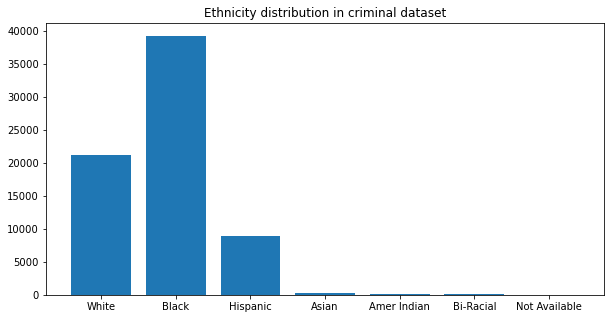

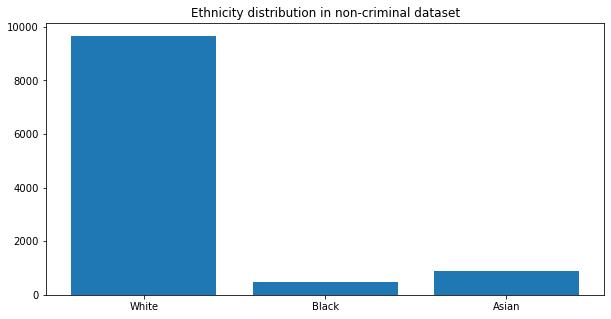

In [9]:
fig = plt.figure(figsize=(10,5))
plt.title('Ethnicity distribution in criminal dataset')
plt.bar(ethnicity_criminals.keys(), ethnicity_criminals.values())
plt.show()

plt.figure(figsize=(10,5))
plt.title('Ethnicity distribution in non-criminal dataset')
plt.bar(ethnicity_non_criminals.keys(), ethnicity_non_criminals.values())
plt.show()

In [14]:
sex_criminal = {}
for gender in ['Female', 'Male']:
    ethnicity_criminals = {}
    for ethnicity in df['Race'].unique():
        count = df.loc[(df['Race'] == ethnicity) & (df['Sex'] == gender)]['ID'].count()
        ethnicity_criminals[ethnicity] = count
    sex_criminal[gender] = ethnicity_criminals

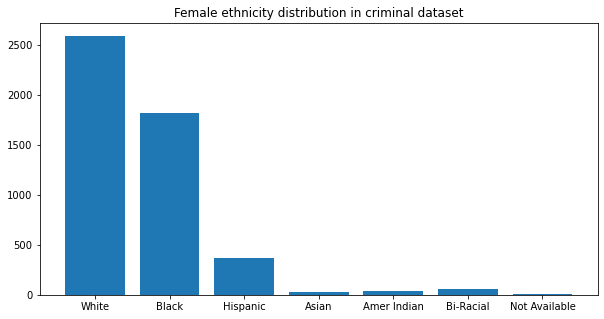

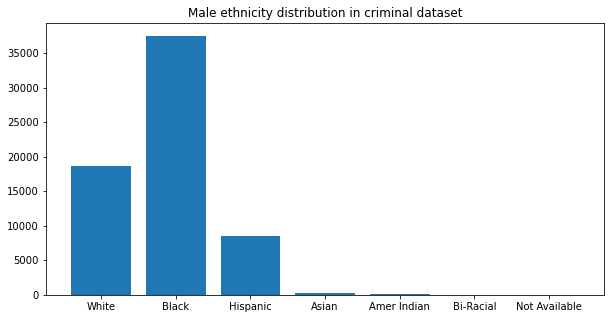

In [15]:
for gender in sex_criminal.keys():
    plt.figure(figsize=(10,5))
    plt.title(f'{gender} ethnicity distribution in criminal dataset')
    plt.bar(sex_criminal[gender].keys(), sex_criminal[gender].values())
    plt.show()

In [22]:
sex_non_criminal = {}

for gender in [1, 0]:
    ethnicity_non_criminals = {}

    num_white_non_criminal = df5.loc[(df5['Male'] == gender) & (df5['White'] == 1) & (df5['Black'] == 0) & (df5['Asian'] == 0)]['person'].count()
    num_black_non_criminal = df5.loc[(df5['Male'] == gender) & (df5['White'] == 0) & (df5['Black'] == 1) & (df5['Asian'] == 0)]['person'].count()
    num_asian_non_criminal = df5.loc[(df5['Male'] == gender) & (df5['White'] == 0) & (df5['Black'] == 0) & (df5['Asian'] == 1)]['person'].count()

    ethnicity_non_criminals['White'] = num_white_non_criminal
    ethnicity_non_criminals['Black'] = num_black_non_criminal
    ethnicity_non_criminals['Asian'] = num_asian_non_criminal

    sex_non_criminal[gender] = ethnicity_non_criminals

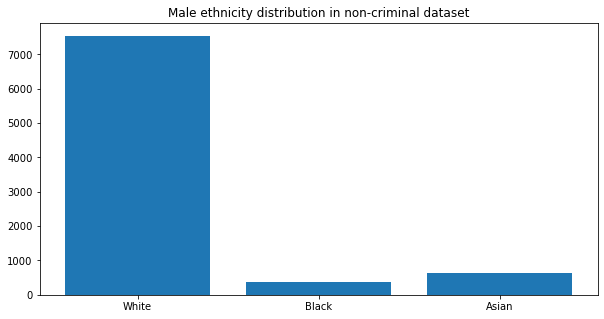

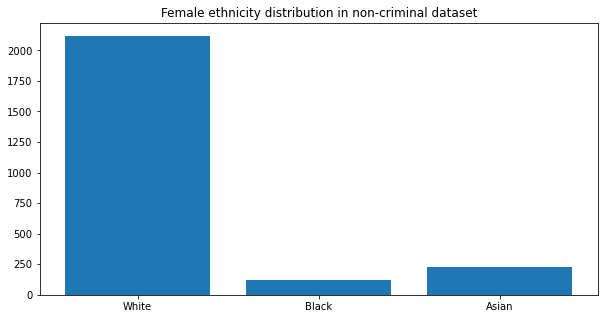

In [24]:
for gender in sex_non_criminal.keys():
    plt.figure(figsize=(10,5))
    plt.title(f'{"Male" if gender == 1 else "Female"} ethnicity distribution in non-criminal dataset')
    plt.bar(sex_non_criminal[gender].keys(), sex_non_criminal[gender].values())
    plt.show()

## Creation of balanced dataset

Non-Criminal White Women (NCWW). It is the set with the lowest number of elements 

In [68]:
ncww = df5.loc[(df5['Male'] == 0) & (df5['White'] == 1) & (df5['Black'] == 0) & (df5['Asian'] == 0)]['person'].unique()
ncww = pd.DataFrame(ncww, columns=['ID'])

In [71]:
ncww.to_csv('./dataset/ncww.csv')

Non-Criminal White Men (NCWM)

In [99]:
ncwm = df5.loc[(df5['Male'] == 1) & (df5['White'] == 1) & (df5['Black'] == 0) & (df5['Asian'] == 0)]['person'].unique()
ncwm = pd.DataFrame(ncwm, columns=['ID'])
ncwm = ncwm.sample(ncww['ID'].count()).reset_index(drop='index')

In [83]:
ncwm.to_csv('./dataset/ncwm.csv')

Criminal White Women (CWW)

In [84]:
cww = df.loc[(df["Sex"] == "Female") & (df['Race'] == 'White')]['ID'].reset_index()['ID'].sample(ncww['ID'].count()).reset_index(drop='index')

In [85]:
cww.to_csv('./dataset/cww.csv')

Criminal White Men (CWM)

In [101]:
# cmw 
cwm = df.loc[(df["Sex"] == "Male") & (df['Race'] == 'White')]['ID'].reset_index()['ID'].sample(ncww['ID'].count()).reset_index(drop='index')

In [64]:
cwm.to_csv('./dataset/cwm.csv')

### Create directory with the balanced dataset

In [91]:
ncww['ID'][0].replace(' ', '_') + '_0001.bmp'

'Adriana_Lima_0001.bmp'

In [96]:
import shutil
import os

dir_path = './dataset/aligned/non-criminal/'

count = 0
names = []

for face in ncww['ID']:
    file = face.replace(' ', '_') + '_0001.bmp'
    # try:
    #     shutil.copyfile(dir_path + file, './dataset/distributed/non-criminal/' + file)        
    # except:
    #     count += 1
    #     names.append(face)

    if not os.path.exists(dir_path + file):
        count += 1
        names.append(face)

print(count)

187


In [100]:
import shutil
import os

dir_path = './dataset/aligned/non-criminal/'

count = 0
names = []

for face in ncwm['ID']:
    file = face.replace(' ', '_') + '_0001.bmp'
    try:
        shutil.copyfile(dir_path + file, './dataset/distributed/non-criminal/' + file)        
    except:
        count += 1
        names.append(face)

print(count)

235


In [109]:
import shutil
import os

dir_path = './dataset/aligned/criminal/'

count = 0
names = []

for i, face in enumerate(cww):
    if len(cww) - i <= 187:
        break 

    file = face + '.bmp'
    try:
        shutil.copyfile(dir_path + file, './dataset/distributed/criminal/' + file)        
    except:
        count += 1
        names.append(face)

print(count)

0


In [110]:
import shutil
import os

dir_path = './dataset/aligned/criminal/'

count = 0
names = []

for i, face in enumerate(cwm):
    if len(cwm) - i + count <= 235:
        break

    file = face + '.bmp'
    try:
        shutil.copyfile(dir_path + file, './dataset/distributed/criminal/' + file)        
    except:
        count += 1
        names.append(face)

print(count)

7


- Criminal distributed dataset: 1984
- Non-criminal distributed dataset: 1928

Distribution of ethnicity and sex in LFW:
https://www.researchgate.net/publication/228888218_Draft_Evaluation_Guidelines_for_Gender_Classification_and_Age_Estimation

Attributes (generated) of LFW:
https://www.cs.columbia.edu/CAVE/databases/pubfig/download/lfw_attributes.txt